In [1]:
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from datetime import datetime
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.utils import column_or_1d

In [5]:
data = pd.read_csv(r"C:\Users\ADMIN\VCB-doan.csv")
print(data)

            Date  Close   Open   High    Low    Vol  Change
0     07/12/2017  36089  36392  36392  35407  3.49M  -0.83%
1     08/12/2017  35672  36089  36089  35255  1.94M  -1.16%
2     11/12/2017  33815  34876  35558  33815  1.85M  -5.21%
3     12/12/2017  33891  34345  34421  31540  3.11M   0.22%
4     13/12/2017  33360  34118  34194  33132  1.50M  -1.57%
...          ...    ...    ...    ...    ...    ...     ...
1504  15/12/2023  82200  84000  84400  82200  2.53M  -2.61%
1505  18/12/2023  81500  82800  82900  81500  1.80M  -0.85%
1506  19/12/2023  81200  81500  81500  80100  1.96M  -0.37%
1507  20/12/2023  81100  81200  81300  80500  1.87M  -0.12%
1508  21/12/2023  80900  81000  81000  80300  2.03M  -0.25%

[1509 rows x 7 columns]


In [6]:
data.describe()

,Close,Open,High,Low
count,1509.000000,1509.000000,1509.000000,1509.000000
mean,68476.884029,68423.245195,69251.243870,67609.089463
std,16286.682851,16290.308648,16402.607046,16137.289424
min,33360.000000,33360.000000,34194.000000,31540.000000
25%,53755.000000,53678.000000,54513.000000,52833.000000
50%,70957.000000,70726.000000,71900.000000,69881.000000
75%,80000.000000,80100.000000,81290.000000,79000.000000
max,106500.000000,105500.000000,107100.000000,104600.000000


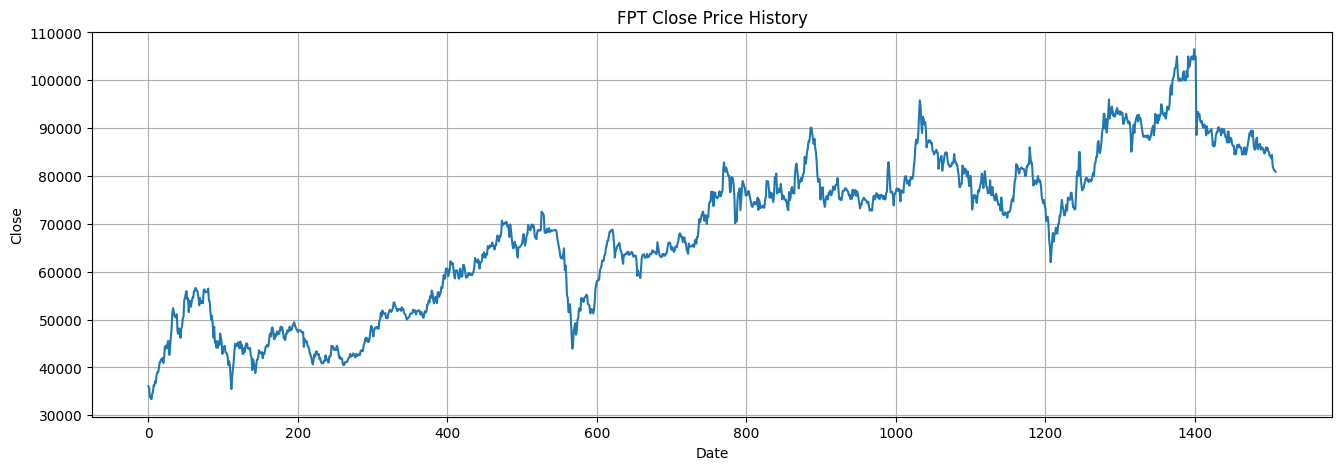

In [7]:


plt.figure(figsize=(16,5))
plt.plot(data["Close"])
plt.title('FPT Close Price History')
plt.xlabel('Date')  # Đặt tên cho trục x
plt.ylabel('Close')  # Đặt tên cho trục y
plt.grid(True)
plt.show()

In [8]:
# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(data))
test_size = int(0.2 * len(data))
val_size = len(data) - train_size - test_size

train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]
val_data = data[train_size+test_size:]

In [9]:
#Training data
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [10]:
# Testing data
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)

In [11]:
#Validate data
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(x_val)


In [12]:
#Creating an index for the next 30 days.
last_index =  data.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Creating an array of 30 consecutive integers starting from last_index.
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predicting the closing price of the stock for the next 30 days.
y_next_30_days = model.predict(x_next_30_days)

print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[101719.84653141 101760.77569917 101801.70486694 101842.6340347
 101883.56320247 101924.49237023 101965.42153799 102006.35070576
 102047.27987352 102088.20904129 102129.13820905 102170.06737681
 102210.99654458 102251.92571234 102292.8548801  102333.78404787
 102374.71321563 102415.6423834  102456.57155116 102497.50071892
 102538.42988669 102579.35905445 102620.28822222 102661.21738998
 102702.14655774 102743.07572551 102784.00489327 102824.93406103
 102865.8632288  102906.79239656]


In [13]:
#RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

Validation RMSE: 11049.297892975028
Testing RMSE: 10062.225561582176


In [14]:
#MAE
valid_mae = mean_absolute_error(y_val,y_pred_val)
test_mae = mean_absolute_error(y_test, y_pred)
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)

Validation MAE: 9966.212307574966
Testing MAE: 8080.295102522582


In [15]:
#MAPE
valid_mape = np.mean(np.abs((y_val - y_pred_val) / y_val))*100
test_mape = np.mean(np.abs((y_test - y_pred) / y_test))*100
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

Validation MAPE: 11.286887714934474
Testing MAPE: 10.616865189873613


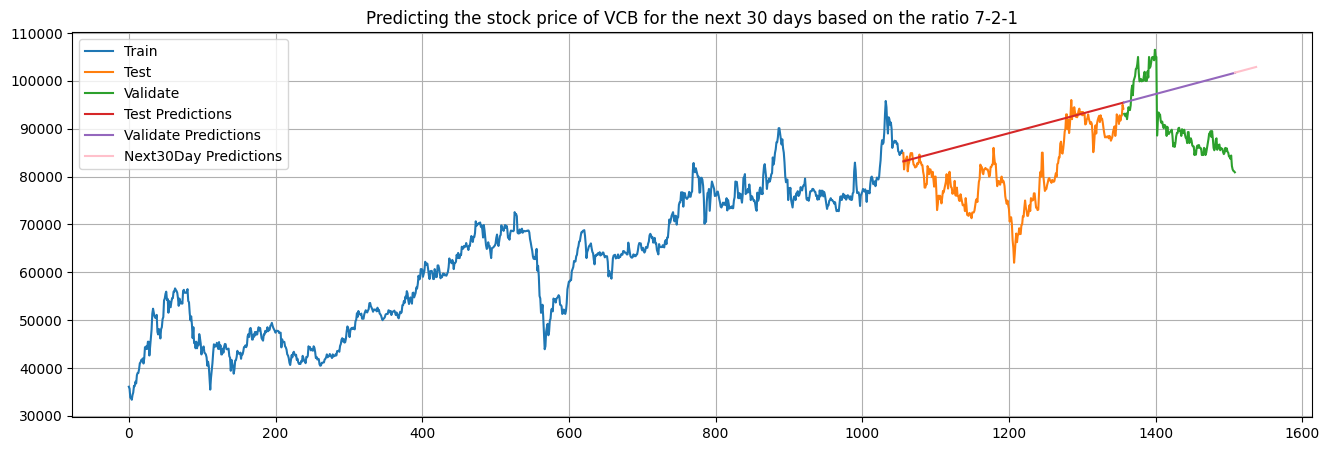

In [35]:
#Drawing plot
plt.figure(figsize=(16,5))
plt.title("Predicting the stock price of VCB for the next 30 days based on the ratio 7-2-1")
plt.grid(True)
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(val_data.index, val_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days, color ="pink")
plt.legend(['Train', 'Test', 'Validate','Test Predictions','Validate Predictions','Next30Day Predictions'])
plt.show()

In [17]:
# Split the data into training, testing, and validation sets
train_size2 = int(0.6 * len(data))
test_size2 = int(0.3 * len(data))
val_size2 = len(data) - train_size2 - test_size2

In [18]:
train_data2 = data[:train_size2]
test_data2 = data[train_size2:train_size2+test_size2]
val_data2 = data[train_size2+test_size2:]

In [19]:
#Training data
x_train2 = np.array(train_data2.index).reshape(-1, 1)
y_train2 = np.array(train_data2['Close'])

# Train the linear regression model
model2 = LinearRegression()
model2.fit(x_train2, y_train2)

LinearRegression()

In [20]:
# Testing data
x_test2 = np.array(test_data2.index).reshape(-1, 1)
y_test2 = np.array(test_data2['Close'])
y_pred2 = model2.predict(x_test2)

#Validate data
x_val2= np.array(val_data2.index).reshape(-1, 1)
y_val2 = np.array(val_data2['Close'])
y_pred_val2 =  model2.predict(x_val2)

In [21]:
#Creating an index for the next 30 days.
last_index2 =  data.index[-1]
last_data2 = pd.RangeIndex(start=last_index2, stop=last_index2+30, step=1)

# Creating an array of 30 consecutive integers starting from last_index.
x_next_30_days2 = np.array(range(last_index2+1, last_index2+31)).reshape(-1, 1)

# Predicting the closing price of the stock for the next 30 days.
y_next_30_days2 = model.predict(x_next_30_days2)

print('Predicted closing prices for the next 30 days:')
print(y_next_30_days2)

Predicted closing prices for the next 30 days:
[101719.84653141 101760.77569917 101801.70486694 101842.6340347
 101883.56320247 101924.49237023 101965.42153799 102006.35070576
 102047.27987352 102088.20904129 102129.13820905 102170.06737681
 102210.99654458 102251.92571234 102292.8548801  102333.78404787
 102374.71321563 102415.6423834  102456.57155116 102497.50071892
 102538.42988669 102579.35905445 102620.28822222 102661.21738998
 102702.14655774 102743.07572551 102784.00489327 102824.93406103
 102865.8632288  102906.79239656]


In [22]:
#RMSE
valid_rmse2 = np.sqrt(np.mean((y_pred_val2 - y_val2)**2))
test_rmse2 = np.sqrt(np.mean((y_pred2 - y_test2)**2))
print('Validation RMSE:', valid_rmse2)
print('Testing RMSE:', test_rmse2)

Validation RMSE: 12177.778917319387
Testing RMSE: 9402.24992633457


In [23]:
#MAE
valid_mae2 = mean_absolute_error(y_val2,y_pred_val2)
test_mae2 = mean_absolute_error(y_test2, y_pred2)
print('Validation MAE:', valid_mae2)
print('Testing MAE:', test_mae2)

Validation MAE: 10827.786143541196
Testing MAE: 7468.603365441996


In [24]:
#MAPE
valid_mape2 = np.mean(np.abs((y_val2 - y_pred_val2) / y_val2))*100
test_mape2 = np.mean(np.abs((y_test2 - y_pred2) / y_test2))*100
print('Validation MAPE:', valid_mape2)
print('Testing MAPE:', test_mape2)

Validation MAPE: 12.323200546439992
Testing MAPE: 9.703137650774911


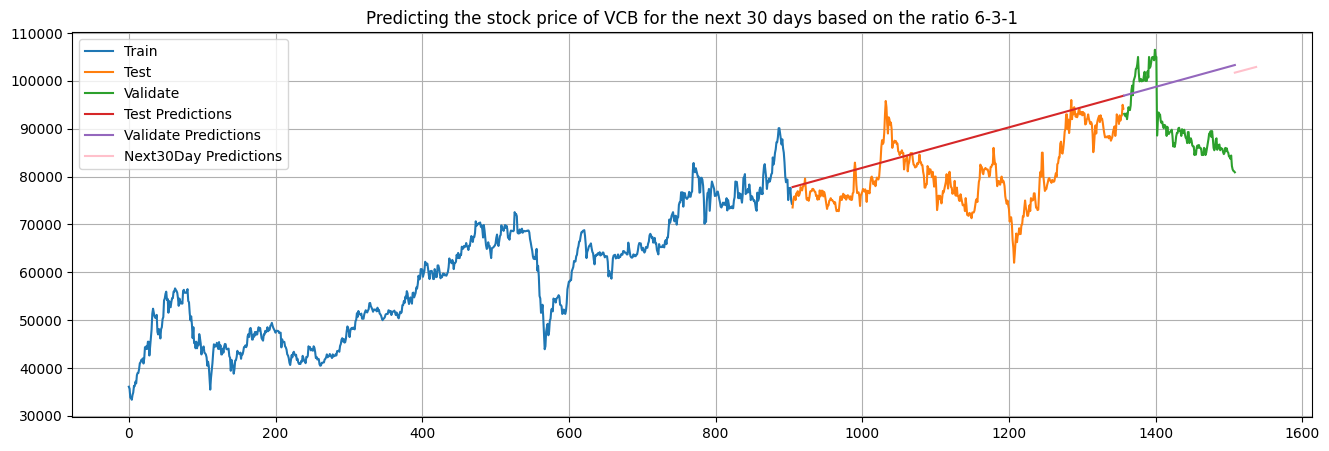

In [36]:
#Drawing plot
plt.figure(figsize=(16,5))
plt.grid(True)
plt.title("Predicting the stock price of VCB for the next 30 days based on the ratio 6-3-1")

plt.plot(train_data2.index, train_data2['Close'])
plt.plot(test_data2.index, test_data2['Close'])
plt.plot(val_data2.index, val_data2['Close'])
plt.plot(test_data2.index, y_pred2)
plt.plot(val_data2.index, y_pred_val2)
plt.plot(last_data2,y_next_30_days2, color ="pink")
plt.legend(['Train', 'Test', 'Validate','Test Predictions','Validate Predictions','Next30Day Predictions'])
plt.show()

In [26]:
# Split the data into training, testing, and validation sets
train_size3 = int(0.5 * len(data))
test_size3 = int(0.3 * len(data))
val_size3 = len(data) - train_size3 - test_size3

In [27]:
train_data3 = data[:train_size3]
test_data3 = data[train_size3:train_size3+test_size3]
val_data3 = data[train_size3+test_size3:]

In [28]:
#Training data
x_train3 = np.array(train_data3.index).reshape(-1, 1)
y_train3 = np.array(train_data3['Close'])

# Train the linear regression model
model3 = LinearRegression()
model3.fit(x_train3, y_train3)

LinearRegression()

In [29]:
# Testing data
x_test3 = np.array(test_data3.index).reshape(-1, 1)
y_test3 = np.array(test_data3['Close'])
y_pred3 = model3.predict(x_test3)

#Validate data
x_val3= np.array(val_data3.index).reshape(-1, 1)
y_val3 = np.array(val_data3['Close'])
y_pred_val3 =  model3.predict(x_val3)

In [30]:
#Creating an index for the next 30 days.
last_index3 =  data.index[-1]
last_data3 = pd.RangeIndex(start=last_index3, stop=last_index3+30, step=1)

# Creating an array of 30 consecutive integers starting from last_index.
x_next_30_days3 = np.array(range(last_index3+1, last_index3+31)).reshape(-1, 1)

# Predicting the closing price of the stock for the next 30 days.
y_next_30_days3 = model3.predict(x_next_30_days3)

print('Predicted closing prices for the next 30 days:')
print(y_next_30_days3)

Predicted closing prices for the next 30 days:
[95782.1366629  95818.3040797  95854.4714965  95890.6389133
 95926.8063301  95962.9737469  95999.14116371 96035.30858051
 96071.47599731 96107.64341411 96143.81083091 96179.97824771
 96216.14566451 96252.31308132 96288.48049812 96324.64791492
 96360.81533172 96396.98274852 96433.15016532 96469.31758212
 96505.48499893 96541.65241573 96577.81983253 96613.98724933
 96650.15466613 96686.32208293 96722.48949973 96758.65691654
 96794.82433334 96830.99175014]


In [31]:
#RMSE
valid_rmse3 = np.sqrt(np.mean((y_pred_val3 - y_val3)**2))
test_rmse3 = np.sqrt(np.mean((y_pred3 - y_test3)**2))
print('Validation RMSE:', valid_rmse3)
print('Testing RMSE:', test_rmse3)

Validation RMSE: 8098.633319873529
Testing RMSE: 6205.766355754884


In [32]:
#MAE
valid_mae3 = mean_absolute_error(y_val3,y_pred_val3)
test_mae3 = mean_absolute_error(y_test3, y_pred3)
print('Validation MAE:', valid_mae3)
print('Testing MAE:', test_mae3)

Validation MAE: 6739.4529757194405
Testing MAE: 4881.798559874101


In [33]:
#MAPE
valid_mape3 = np.mean(np.abs((y_val3 - y_pred_val3) / y_val3))*100
test_mape3 = np.mean(np.abs((y_test3 - y_pred3) / y_test3))*100
print('Validation MAPE:', valid_mape3)
print('Testing MAPE:', test_mape3)

Validation MAPE: 8.025786550274402
Testing MAPE: 6.170530135045822


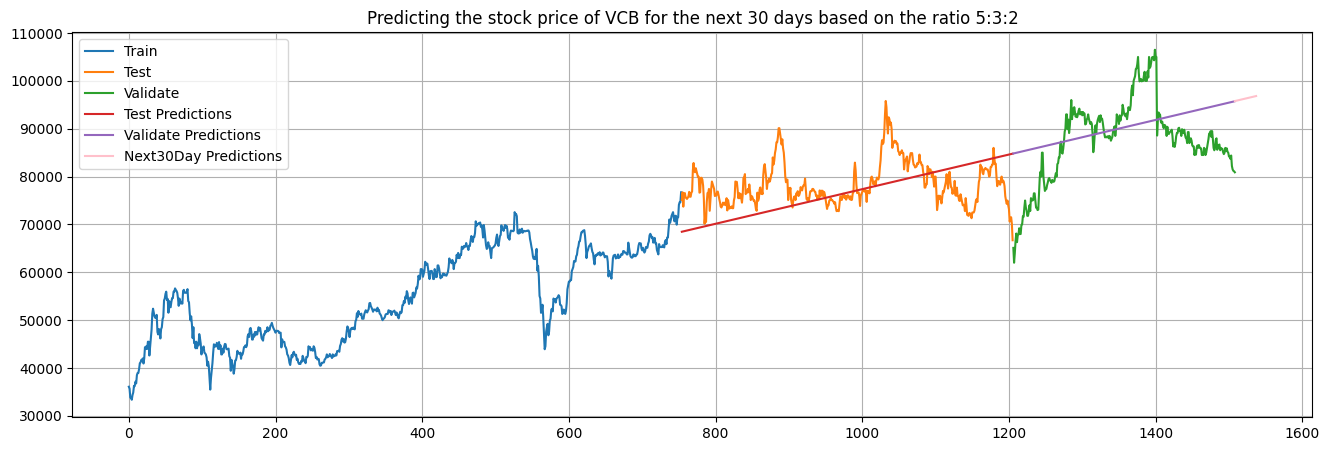

In [37]:
#Drawing plot
plt.figure(figsize=(16,5))
plt.grid(True)
plt.title("Predicting the stock price of VCB for the next 30 days based on the ratio 5:3:2")

plt.plot(train_data3.index, train_data3['Close'])
plt.plot(test_data3.index, test_data3['Close'])
plt.plot(val_data3.index, val_data3['Close'])
plt.plot(test_data3.index, y_pred3)
plt.plot(val_data3.index, y_pred_val3)
plt.plot(last_data3,y_next_30_days3, color ="pink")
plt.legend(['Train', 'Test', 'Validate','Test Predictions','Validate Predictions','Next30Day Predictions'])
plt.show()

In [ ]:
VCB